In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import silhouette_score

In [24]:
import pandas as pd
df = pd.read_csv(r'Downloads/DS1_C9_S7_Project_AbsenteeismAtWork_Data.csv', sep=';')
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [3]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [ ]:
#DATA CLEANING
PERFORM THE NECESSRY CLEANING STEPS TO CONVERT INTO MESSY

In [4]:
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [5]:
df.dtypes

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

In [6]:
#performing otlier
def outliers(df):
    for col in df.select_dtypes(include=['number']).columns:
        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        IQR=q3-q1
        LF=q1-1.5*IQR
        UF=q3+1.5*IQR
        outlier=df[(df[col]<LF) | (df[col]>UF)]
    return outlier

# call
alloutlier=outliers(df)
alloutlier

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
8,14,19,7,2,1,155,12,14,34,239.554,...,0,1,2,1,0,0,95,196,25,40
22,10,13,8,2,1,361,52,3,28,205.917,...,0,1,1,1,0,4,80,172,27,40
49,15,14,9,2,4,291,31,12,40,241.476,...,0,1,1,1,0,1,73,171,25,32
85,14,10,11,2,4,155,12,14,34,306.345,...,0,1,2,1,0,0,95,196,25,32
87,15,14,11,2,4,291,31,12,40,306.345,...,0,1,1,1,0,1,73,171,25,40
96,11,7,11,4,4,289,36,13,33,306.345,...,0,1,2,1,0,1,90,172,30,24
99,34,19,12,3,4,118,10,10,37,261.306,...,0,1,0,0,0,0,83,172,28,64
104,34,19,12,3,4,118,10,10,37,261.306,...,0,1,0,0,0,0,83,172,28,56
163,20,13,3,6,2,260,50,11,36,343.253,...,0,1,4,1,0,0,65,168,23,40
164,17,11,3,2,2,179,22,17,40,343.253,...,0,2,2,0,1,0,63,170,22,40


In [8]:
# Removed outliers for all the columns:
def remove_outliers(df):
    for col in df.select_dtypes(include=['number']).columns:
        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        IQR=q3-q1
        LF=q1-1.5*IQR
        UF=q3+1.5*IQR
        outlier_removal=df[(df[col]<=LF) & (df[col]>=UF)]
    return outlier_removal
alloutlier=remove_outliers(df)
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [9]:
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [10]:
df1=df.drop_duplicates()
df1

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [ ]:
#TASK2:UNDERSTANDING ABSENTEESIM PATTERNS

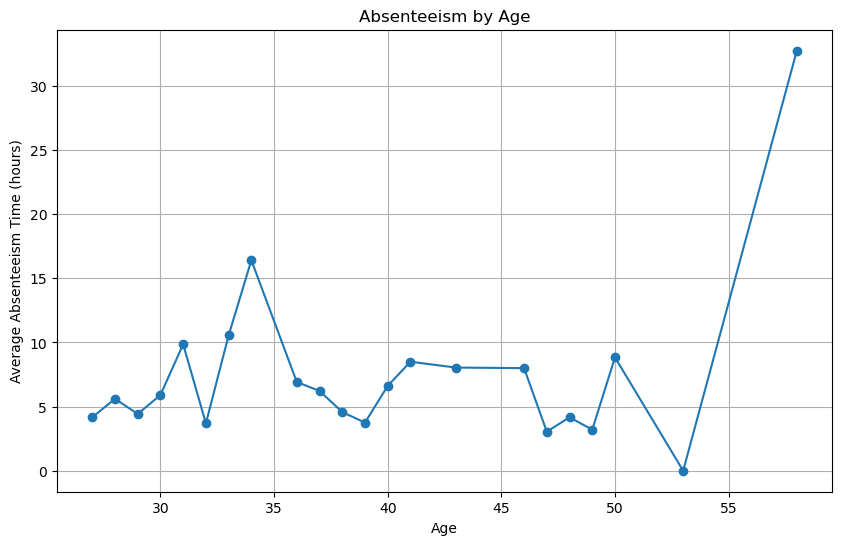

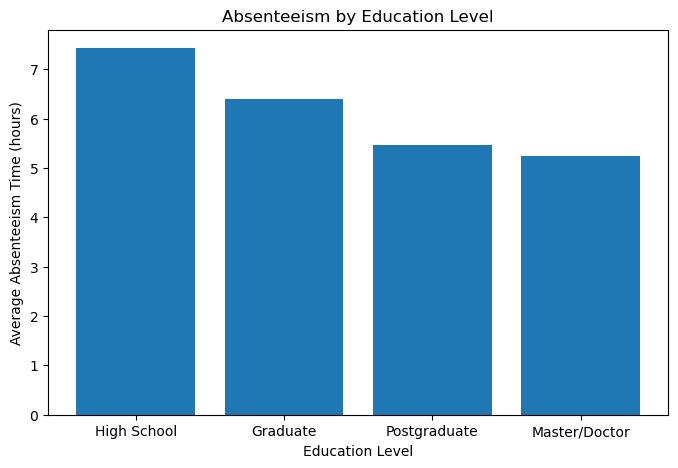

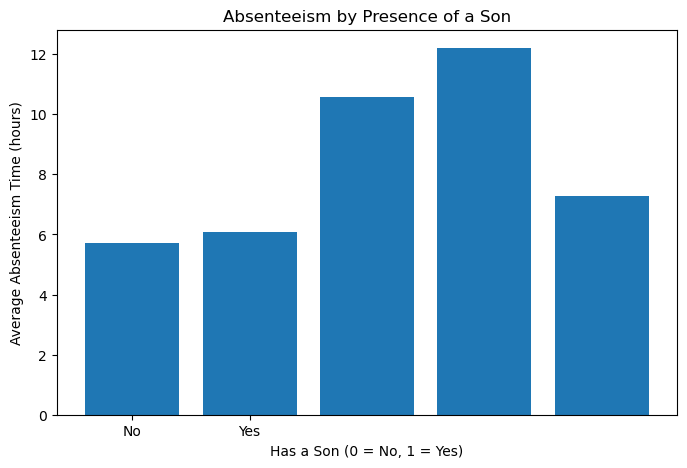

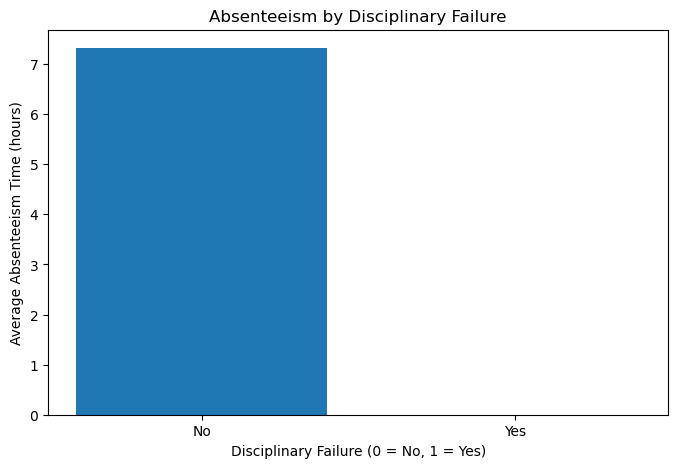

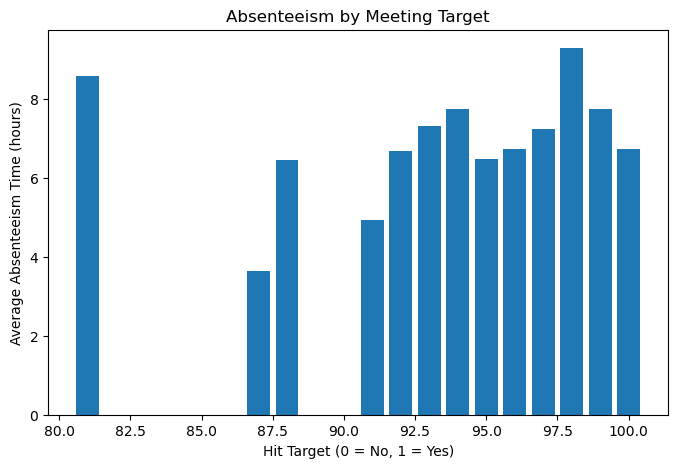

In [11]:
# 1. Absenteeism by Age
age_group_absenteeism = df1.groupby('Age')['Absenteeism time in hours'].mean().reset_index()

# Plot absenteeism by Age
plt.figure(figsize=(10, 6))
plt.plot(age_group_absenteeism['Age'], age_group_absenteeism['Absenteeism time in hours'], marker='o')
plt.title('Absenteeism by Age')
plt.xlabel('Age')
plt.ylabel('Average Absenteeism Time (hours)')
plt.grid(True)
plt.show()

# 2. Absenteeism by Education
education_group_absenteeism = df1.groupby('Education')['Absenteeism time in hours'].mean().reset_index()

# Bar plot for absenteeism by Education
plt.figure(figsize=(8, 5))
plt.bar(education_group_absenteeism['Education'], education_group_absenteeism['Absenteeism time in hours'])
plt.title('Absenteeism by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Absenteeism Time (hours)')
plt.xticks([1, 2, 3, 4], ['High School', 'Graduate', 'Postgraduate', 'Master/Doctor'])
plt.show()

# 3. Absenteeism by Son (Has a Son vs No Son)
son_group_absenteeism = df1.groupby('Son')['Absenteeism time in hours'].mean().reset_index()

# Bar plot for absenteeism by Son
plt.figure(figsize=(8, 5))
plt.bar(son_group_absenteeism['Son'], son_group_absenteeism['Absenteeism time in hours'])
plt.title('Absenteeism by Presence of a Son')
plt.xlabel('Has a Son (0 = No, 1 = Yes)')
plt.ylabel('Average Absenteeism Time (hours)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# 4. Absenteeism by Reason for Absence
reason_group_absenteeism = df1.groupby('Reason for absence')['Absenteeism time in hours'].mean().reset_index()

# 5. Absenteeism by Disciplinary Failure
disciplinary_group_absenteeism = df.groupby('Disciplinary failure')['Absenteeism time in hours'].mean().reset_index()

# Bar plot for absenteeism by Disciplinary Failure
plt.figure(figsize=(8, 5))
plt.bar(disciplinary_group_absenteeism['Disciplinary failure'], disciplinary_group_absenteeism['Absenteeism time in hours'])
plt.title('Absenteeism by Disciplinary Failure')
plt.xlabel('Disciplinary Failure (0 = No, 1 = Yes)')
plt.ylabel('Average Absenteeism Time (hours)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# 6. Absenteeism by Hit Target
hit_target_group_absenteeism = df1.groupby('Hit target')['Absenteeism time in hours'].mean().reset_index()

# Bar plot for absenteeism by Hit Target
plt.figure(figsize=(8, 5))
plt.bar(hit_target_group_absenteeism['Hit target'], hit_target_group_absenteeism['Absenteeism time in hours'])
plt.title('Absenteeism by Meeting Target')
plt.xlabel('Hit Target (0 = No, 1 = Yes)')
plt.ylabel('Average Absenteeism Time (hours)')

plt.show()

In [12]:
df1.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [13]:
#Absenteeism by Disciplinary Failure
disciplinary_group_absenteeism = df.groupby('Disciplinary failure')['Absenteeism time in hours'].mean().reset_index()
disciplinary_group_absenteeism

,Disciplinary failure,Absenteeism time in hours
0,0,7.32
1,1,0.00


In [14]:
#TASK3what are most common reasons for employee absence 
df2=df1['Reason for absence'].value_counts(normalize=True).sort_values(ascending=True).mode()
df2


0    0.001416
1    0.004249
Name: proportion, dtype: float64

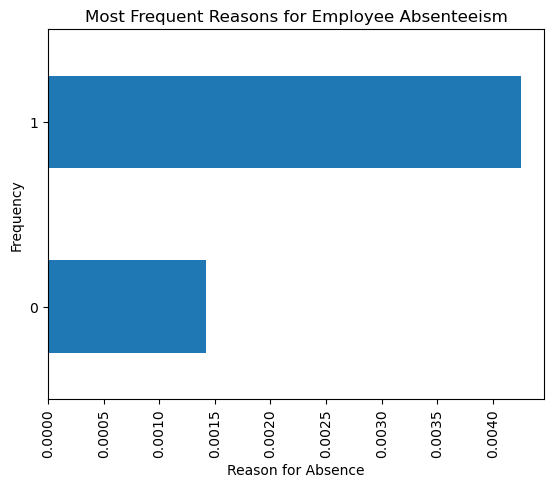

In [15]:
df2.plot(x=df2.index, y=df2.values,kind='barh')
plt.title('Most Frequent Reasons for Employee Absenteeism')
plt.xlabel('Reason for Absence')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [16]:
print("Unique Reasons for Absence:\n", df1['Reason for absence'].value_counts(normalize=True).unique())

Unique Reasons for Absence:
 [0.20113314 0.1529745  0.07790368 0.06657224 0.06090652 0.05665722
 0.05240793 0.04674221 0.04390935 0.0368272  0.03541076 0.02974504
 0.02691218 0.02266289 0.02124646 0.01133144 0.00849858 0.00566572
 0.00424929 0.00283286 0.00141643]


In [ ]:
#TASK4 PREDICTION ABSENTEESIM DURATION

In [17]:
df1.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')


Model Performance Metrics:
Mean Absolute Error (MAE): 5.34
Mean Squared Error (MSE): 99.54
Root Mean Squared Error (RMSE): 9.98
R-squared (R²): 0.02

Feature Importance:
                           Feature  Coefficient
5                              Age     1.905245
4           Transportation expense     0.867198
6           Work load Average/day     -0.304263
2  Distance from Residence to Work    -1.087041
3                  Body mass index    -1.394153
1             Disciplinary failure    -4.476489
0               Reason for absence    -4.539020
Intercept: 7.377120281344307
Slope: -4.539020428980628


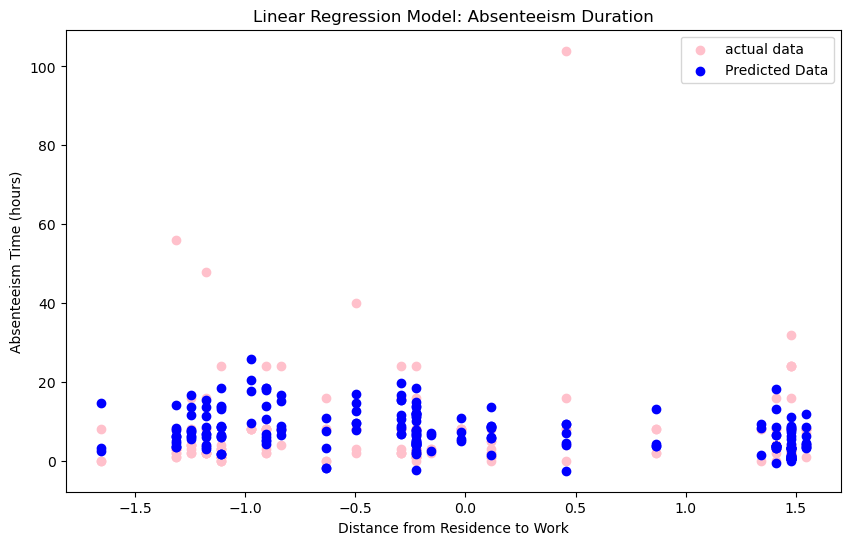

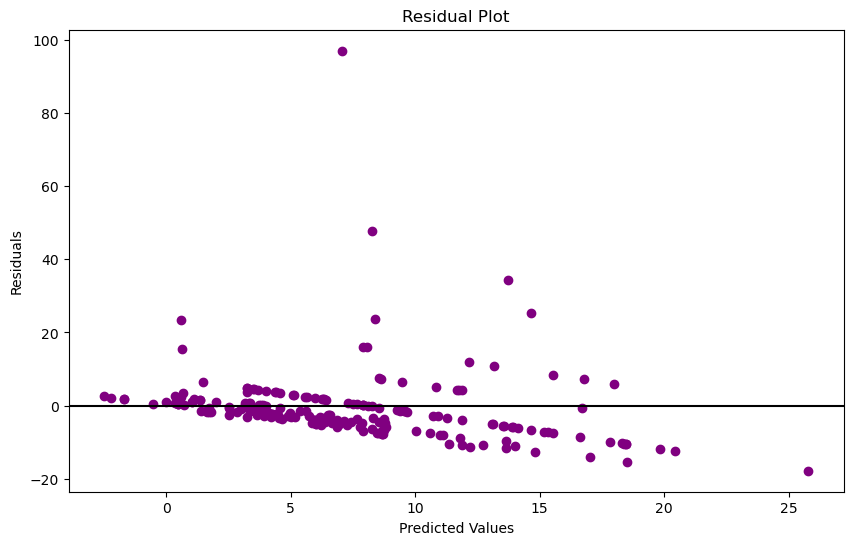

In [18]:
#TASK4 PREDICTING ABSENTEESIM DURATION
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
# Data Preprocessing
# Select relevant features and target variable
features = ['Reason for absence', 'Disciplinary failure', 'Distance from Residence to Work',
            'Body mass index', 'Transportation expense', 'Age', 'Work load Average/day ']
target = 'Absenteeism time in hours'

# Features and Target
X = df1[features]
y = df1[target]

# Standardize the features (important for regression)
scaler = StandardScaler()
x = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Model Building - Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display Results
print("\nModel Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Display feature importance (coefficients)
feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print("\nFeature Importance:")
print(feature_importance.sort_values(by='Coefficient', ascending=False))

#Evaluate intercept and slope values.
intercept = model.intercept_
slope = model.coef_[0]
print(f"Intercept: {intercept}")
print(f"Slope: {slope}")

import matplotlib.pyplot as plt
feature_index = 2  # Index of 'Distance from Residence to Work' in features list
X_test_single_feature = X_test[:, feature_index]

plt.figure(figsize=(10, 6))
plt.scatter(X_test_single_feature, y_test, color='pink', label='actual data')
plt.scatter(X_test_single_feature, y_pred, color='blue', label='Predicted Data')
plt.title('Linear Regression Model: Absenteeism Duration')
plt.xlabel(features[feature_index])
plt.ylabel('Absenteeism Time (hours)')
plt.legend()
plt.show()

#residual plot

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='purple')
plt.axhline(y=0, color='black')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()
